In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.layers import BatchNormalization

import PIL
from PIL import ImageTk, ImageDraw, Image
from tkinter import *
from keras.preprocessing import image
import os

In [2]:
train_ds = tf.keras.utils.image_dataset_from_directory(
    directory='input_destination/test',
    class_names=None, color_mode='rgb', batch_size=32, image_size=(32,
    32), shuffle=True, seed=128, validation_split=0.2, subset="training",
    
)

val_ds = tf.keras.utils.image_dataset_from_directory(
    directory='input_destination/test',
    class_names=None, color_mode= "rgb", batch_size=32, image_size=(32,
    32), shuffle=True, seed=123,validation_split=0.2, subset="validation",
    
)

Found 36604 files belonging to 122 classes.
Using 29284 files for training.
Found 36604 files belonging to 122 classes.
Using 7320 files for validation.


In [3]:
class_names = train_ds.class_names
print(class_names)

for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

['0', '1', '10', '100', '101', '102', '103', '104', '105', '106', '107', '108', '109', '11', '110', '111', '112', '113', '114', '115', '116', '117', '118', '119', '12', '120', '121', '13', '14', '15', '16', '17', '18', '19', '2', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '3', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '4', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '5', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '6', '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '7', '70', '71', '72', '73', '74', '75', '76', '77', '78', '79', '8', '80', '81', '82', '83', '84', '85', '86', '87', '88', '89', '9', '90', '91', '92', '93', '94', '95', '96', '97', '98', '99']
(32, 32, 32, 3)
(32,)


In [4]:
classifier = Sequential()

classifier.add(Conv2D(filters = 64, kernel_size = (3, 3), activation = 'relu', input_shape = (32, 32, 3)))
classifier.add(Conv2D(filters = 64, kernel_size = (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))
classifier.add(Dropout(.15))

classifier.add(Conv2D(filters = 64, kernel_size = (3, 3), activation = 'relu'))
classifier.add(BatchNormalization())

classifier.add(Conv2D(filters = 64, kernel_size = (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))
classifier.add(BatchNormalization())
#classifier.add(Dropout(.1))

classifier.add(Conv2D(filters = 64, kernel_size = (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))
#classifier.add(Dropout(.1))

classifier.add(Flatten())

classifier.add(Dense(units = 2048, activation = 'relu'))
classifier.add(Dropout(.15))

classifier.add(Dense(units = 122, activation = 'softmax'))

#classifier.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])


classifier.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [5]:
epochs=70
history = classifier.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)


Epoch 1/70


G:\Anaconda\envs\tf-gpu\lib\site-packages\keras\backend.py:4907: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  '"`sparse_categorical_crossentropy` received `from_logits=True`, but '


916/916 [==============================] - 670s 723ms/step - loss: 2.2135 - accuracy: 0.4408 - val_loss: 1.2093 - val_accuracy: 0.6577
Epoch 2/70
916/916 [==============================] - 722s 776ms/step - loss: 1.0711 - accuracy: 0.6965 - val_loss: 0.8676 - val_accuracy: 0.7507
Epoch 3/70
916/916 [==============================] - 415s 447ms/step - loss: 0.8056 - accuracy: 0.7686 - val_loss: 0.6371 - val_accuracy: 0.8139
Epoch 4/70
916/916 [==============================] - 154s 168ms/step - loss: 0.6634 - accuracy: 0.8032 - val_loss: 0.6035 - val_accuracy: 0.8283
Epoch 5/70
916/916 [==============================] - 170s 185ms/step - loss: 0.5502 - accuracy: 0.8330 - val_loss: 0.5973 - val_accuracy: 0.8194
Epoch 6/70
916/916 [==============================] - 147s 160ms/step - loss: 0.4813 - accuracy: 0.8522 - val_loss: 0.4388 - val_accuracy: 0.8753
Epoch 7/70
916/916 [==============================] - 141s 154ms/step - loss: 0.4088 - accuracy: 0.8716 - val_loss: 0.4473 - val_accura

Epoch 57/70
916/916 [==============================] - 141s 154ms/step - loss: 0.0549 - accuracy: 0.9828 - val_loss: 0.3152 - val_accuracy: 0.9612
Epoch 58/70
916/916 [==============================] - 150s 164ms/step - loss: 0.0500 - accuracy: 0.9844 - val_loss: 0.2897 - val_accuracy: 0.9605
Epoch 59/70
916/916 [==============================] - 143s 156ms/step - loss: 0.0606 - accuracy: 0.9816 - val_loss: 0.3101 - val_accuracy: 0.9598
Epoch 60/70
916/916 [==============================] - 141s 153ms/step - loss: 0.0632 - accuracy: 0.9800 - val_loss: 0.3124 - val_accuracy: 0.9581
Epoch 61/70
916/916 [==============================] - 135s 147ms/step - loss: 0.0596 - accuracy: 0.9821 - val_loss: 0.3409 - val_accuracy: 0.9555
Epoch 62/70
916/916 [==============================] - 135s 147ms/step - loss: 0.0602 - accuracy: 0.9816 - val_loss: 0.3245 - val_accuracy: 0.9615
Epoch 63/70
916/916 [==============================] - 134s 147ms/step - loss: 0.0572 - accuracy: 0.9823 - val_loss: 0

In [6]:
classifier.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 64)        1792      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 64)        36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 12, 12, 64)        36928     
_________________________________________________________________
batch_normalization (BatchNo (None, 12, 12, 64)        256       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 10, 10, 64)        3

In [7]:
classifier_json = classifier.to_json()

with open("CNN_BanglaHandWrittenCharacterRecognition.json", "w") as json_file:
    json_file.write(classifier_json)
    
classifier.save_weights("CNN_BanglaHandWrittenCharacterRecognition.h5")
print('Saved model to disk')

Saved model to disk


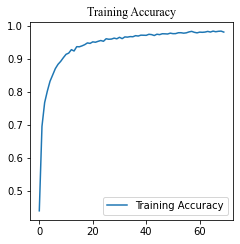

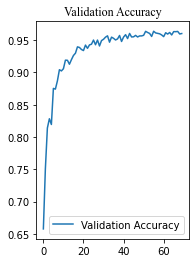

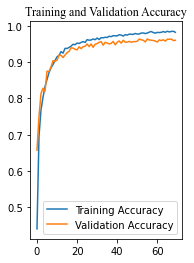

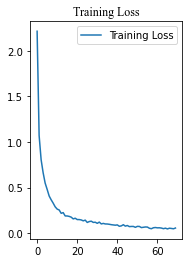

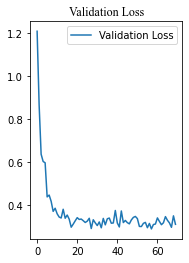

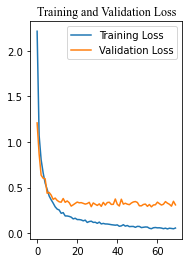

In [17]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(2, 2, 2)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.legend(loc='lower right')
plt.title('Training Accuracy',fontname = 'Times New Roman')
plt.show()
plt.subplot(1, 2, 2)
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Validation Accuracy',fontname = 'Times New Roman')
plt.show()
plt.subplot(1, 2, 2)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy',fontname = 'Times New Roman')
plt.show()
plt.subplot(1,2,2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.legend(loc='upper right')
plt.title('Training Loss', fontname = 'Times New Roman')
plt.show()
plt.subplot(1, 2, 2)
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Validation Loss', fontname = 'Times New Roman')
plt.show()
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss', fontname = 'Times New Roman')
plt.show()


In [18]:
from keras.preprocessing.image import ImageDataGenerator
from PIL import ImageFile
import numpy as np
test_generator = ImageDataGenerator()
test_data_generator = test_generator.flow_from_directory(
    'input_destination/validate', # Put your path here
     target_size=(32, 32),
    batch_size=32,
    shuffle=False)
test_steps_per_epoch = np.math.ceil(test_data_generator.samples / test_data_generator.batch_size)

predictions = classifier.predict_generator(test_data_generator, steps=test_steps_per_epoch)
# Get most likely class
predicted_classes = np.argmax(predictions, axis=1)
true_classes = test_data_generator.classes
class_labels = list(test_data_generator.class_indices.keys())
print(true_classes)
print(class_labels)
print(predicted_classes)
#score = tf.nn.softmax(predicted_classes[0])

#print("This image most likely belongs to {} with a {:.2f} percent confidence."
#            .format(class_names[np.argmax(score)], 100 * np.max(score))
 #       )
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(class_labels)

Found 122 images belonging to 122 classes.


G:\Anaconda\envs\tf-gpu\lib\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121]
['0', '1', '10', '100', '101', '102', '103', '104', '105', '106', '107', '108', '109', '11', '110', '111', '112', '113', '114', '115', '116', '117', '118', '119', '12', '120', '121', '13', '14', '15', '16', '17', '18', '19', '2', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '3', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '4', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '5', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '6', '60', '61', '6

LabelEncoder()

In [19]:
from sklearn.metrics import confusion_matrix

#confusion_matrix(class_labels, predictions)
cm = tf.math.confusion_matrix(true_classes,predicted_classes)
print(cm)

tf.Tensor(
[[1 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 1]], shape=(122, 122), dtype=int32)


In [30]:
import seaborn as sns
fig = plt.figure(figsize=(244,244))
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax, fmt = "d",vmin=0, vmax=1,linewidths=.5,square=True); #annot=True to annotate cells
# labels, title and ticks
ax.set_xlabel('Predicted', fontsize=200)
ax.xaxis.set_label_position('bottom')
plt.xticks(rotation=90)
ax.xaxis.set_ticklabels(predicted_classes, fontsize = 40)
ax.xaxis.tick_bottom()

ax.set_ylabel('True', fontsize=200)
ax.yaxis.set_ticklabels(true_classes, fontsize = 40)
plt.yticks(rotation=0)

plt.title('Confusion Matrix for validation data', fontsize=200)

plt.savefig('Test confusion matrix.png')
plt.show()

In [20]:
from sklearn.metrics import precision_score
precision = precision_score(true_classes,predicted_classes, average='weighted')
print('Precision: %.3f' % precision)

Precision: 0.914


G:\Anaconda\envs\tf-gpu\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [21]:
from sklearn.metrics import recall_score
recall = recall_score(true_classes,predicted_classes, average='weighted')
print('Recall: %.3f' % recall)

Recall: 0.943


In [22]:
from sklearn.metrics import f1_score

f1_score=f1_score(true_classes,predicted_classes, average='weighted')
print('F1: %.3f' % f1_score)

F1: 0.923


['Char Name', ' া', ' ি', ' ী', ' ু', ' ূ', ' ৃ', ' ে', ' ৈ', ' ো', ' ৌ', ' অ', ' আ', ' ই', ' ঈ', ' উ', ' ঊ', ' ঋ', ' এ', ' ঐ', ' ও', ' ঔ', ' ক', ' খ', ' গ', ' ঘ', ' ঙ', ' চ', ' ছ', ' জ', ' ঝ', ' ঞ', ' ট', ' ঠ', ' ড', ' ঢ', ' ণ', ' ত', ' থ', ' দ', ' ধ', ' ন', ' প', ' ফ', ' ব', ' ভ', ' ম', ' য', ' র', ' ল', ' শ', ' ষ', ' স', ' হ', ' ড়', ' ঢ়', ' য়', ' ৎ', ' ং', ' ঃ', ' ঁ', 'ব্দ', 'ঙ্গ', 'স্ক', 'স্ফ', 'চ্ছ', 'স্থ', 'ক্ত', 'স্ন', 'ষ্ণ', 'ম্প', 'প্ত', 'ম্ব', 'ত্থ', 'দ্ভ', 'ষ্ঠ', 'ল্প', 'ষ্প', 'ন্দ', 'ন্ধ', 'স্ম', 'ণ্ঠ', 'স্ত', 'ষ্ট', 'ন্ম                   ', 'ত্ত', 'ঙ্খ', 'ত্ন', 'ন্ড', 'জ্ঞ', 'ড্ড', 'ক্ষ', 'দ্ব', 'চ্চ', 'ক্র', 'দ্দ', 'জ্জ', 'ক্ক', 'ন্ত', 'ক্ট', 'ঞ্চ', 'ট্ট', 'শ্চ', 'ক্স', 'জ্ব', 'ঞ্জ', 'দ্ধ', 'ন্ন', 'ঘ্ন', 'ক্ল', 'হ্ন', 'স্প', 'ল্ত', '০', '১', '২', '৩', '৪', '৫', '৬', '৭', '৮', '৯']
123
Found 0 images belonging to 0 classes.


MemoryError: Unable to allocate 0 bytes for an array with shape (0, 32, 32, 3, 3) and data type float32

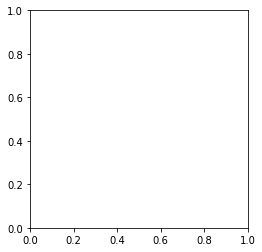

In [282]:
import csv
noise_amp=[]         #an empty list to store the second column
with open('metaData_img.csv', 'r', encoding="utf8") as rf:
    reader = csv.reader(rf, delimiter=',')
    for row in reader:
      noise_amp.append(row[1])
    
#metaData_img.csv
print(noise_amp)
print(len(noise_amp))

for i in  range(len(noise_amp)):

    import tensorflow_io as tfio
    #img = tf.keras.utils.load_img('G:\\Study\\11-30-2020\\Demo Ocr\\Final OCR\\Sentence\\result[i].jpg', target_size = (32, 32, 3))
    #plt.imshow(img)
    #from PIL import Image
    #img=tfio.experimental.color.rgb_to_grayscale(image)
    image_data_generator = ImageDataGenerator()
    
    img= tf.keras.preprocessing.image.DirectoryIterator("G:\\Study\\11-30-2020\\Demo Ocr\\Final OCR\\Sentence", image_data_generator, target_size=(32, 32, 3),
    color_mode='rgb', classes=None, class_mode='categorical',
    batch_size=32, shuffle=True, seed=None, data_format=None, save_to_dir=None,
    save_prefix='', save_format='png', follow_links=False,
    subset=None, interpolation='nearest', dtype=None
)


    #img = Image.open('G:/Study/11-30-2020/Demo Ocr/0_B.BARI_10_1_365.jpg')
    plt.imshow(img)
    #img = img.resize((32, 32))
    img_array = tf.keras.utils.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0) # Create a batch

    predictions = classifier.predict(img_array)
    score = tf.nn.softmax(predictions[0])

    print("This image most likely belongs to {} with a {:.2f} percent confidence."
                .format(class_names[np.argmax(score)], 100 * np.max(score))
            )

        #test_img_arr = image.img_to_array(test_img)
        #test_img_arr = np.expand_dims(test_img_arr, axis = 0)
        #prediction = classifier.predict(test_img_arr)
    result = np.argmax(predictions, axis = 1)
    class_num=int(class_names[np.argmax(score)])
    print(class_num)
    #determine_character(result)
    print(noise_amp[class_num])

In [23]:
from keras.preprocessing.image import ImageDataGenerator
from PIL import ImageFile
import numpy as np
c_test_generator = ImageDataGenerator()
c_test_data_generator = c_test_generator.flow_from_directory(
    'input_destination/Custom Validation', # Put your path here
     target_size=(32, 32),
    shuffle=False)
c_test_steps_per_epoch = np.math.ceil(c_test_data_generator.samples / c_test_data_generator.batch_size)

c_predictions = classifier.predict_generator(c_test_data_generator, steps=c_test_steps_per_epoch)
# Get most likely class
c_predicted_classes = np.argmax(c_predictions, axis=1)
c_true_classes = c_test_data_generator.classes
#c_class_labels = list(c_test_data_generator.class_indices.keys())
print(c_true_classes)
#print(c_class_labels)
print(c_predicted_classes)
#score = tf.nn.softmax(predicted_classes[0])

#print("This image most likely belongs to {} with a {:.2f} percent confidence."
#            .format(class_names[np.argmax(score)], 100 * np.max(score))
 #       )
from sklearn import preprocessing
#c_le = preprocessing.LabelEncoder()
#c_le.fit(c_class_labels)

Found 122 images belonging to 122 classes.


G:\Anaconda\envs\tf-gpu\lib\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121]
[  0   1   2   3   4   5   6   7   8   9  10  11  12  92  14  15  16  17
  18  31  82  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  53  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  98  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  84  82  83  82  85  86  87  88  89
  90  24  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 117 110 111 112 113 114 115 116 117 118 119 120 121]


In [24]:
from sklearn.metrics import confusion_matrix

#confusion_matrix(class_labels, predictions)
c_cm = tf.math.confusion_matrix(c_true_classes,c_predicted_classes)
print(c_cm)

tf.Tensor(
[[1 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 ...
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 1]], shape=(122, 122), dtype=int32)


In [29]:
import seaborn as sns
fig = plt.figure(figsize=(244,244))
ax= plt.subplot()
sns.heatmap(c_cm, annot=True, ax = ax, fmt = "d",vmin=0, vmax=1,linewidths=.5,square=True); #annot=True to annotate cells
# labels, title and ticks
ax.set_xlabel('Predicted', fontsize=200)
ax.xaxis.set_label_position('bottom')
plt.xticks(rotation=90)
ax.xaxis.set_ticklabels(c_predicted_classes, fontsize = 40)
ax.xaxis.tick_bottom()

ax.set_ylabel('True', fontsize=200)
ax.yaxis.set_ticklabels(c_true_classes, fontsize = 40)
plt.yticks(rotation=0)

plt.title('Confusion Matrix for Scanned Data', fontsize=200)

plt.savefig('Custom_data_confusion_matrix.png')
plt.show()

In [25]:
from sklearn.metrics import precision_score
c_precision = precision_score(c_true_classes,c_predicted_classes, average='macro')
print('Precision: %.3f' % c_precision)

Precision: 0.896


In [26]:
from sklearn.metrics import recall_score
c_recall = recall_score(c_true_classes,c_predicted_classes, average='weighted')
print('Recall: %.3f' % c_recall)

Recall: 0.926


In [27]:
from sklearn.metrics import f1_score

c_f1_score=f1_score(c_true_classes,c_predicted_classes, average='weighted')
print('F1: %.3f' % c_f1_score)

F1: 0.906


In [30]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
recision, recall, thresholds = precision_recall_curve(c_true_classes,c_predicted_classes)

plt.figure(figsize = (10,8))
plt.plot([0, 1], [0.5, 0.5],'k--')
plt.plot(recall, precision, label = 'Knn')
plt.xlabel('recall')
plt.ylabel('precision')
plt.title('Knn(n_neighbors = 8) PRC curve')
plt.show()

ValueError: multiclass format is not supported

G:\Anaconda\envs\tf-gpu\lib\site-packages\ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  after removing the cwd from sys.path.


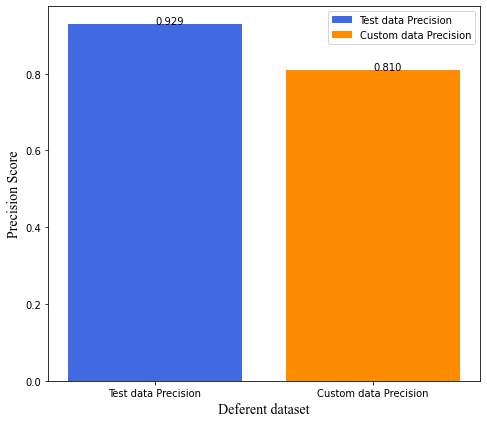

In [203]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax1 = fig.add_axes([0,0,1,1.3])
ax2 = fig.add_axes([0,0,1,1.3])
Precision_y= (precision, c_precision)
ax1.bar('Test data Precision',precision,color='royalblue')
ax2.bar('Custom data Precision',c_precision,color='darkorange')
title= ['Test data Precision', 'Custom data Precision']
plt.xlabel("Deferent dataset",fontsize=14,fontname = 'Times New Roman')
plt.ylabel("Precision Score",fontsize=14,fontname = 'Times New Roman')
#scorevalue = [c_f1_score,f1_score]
#ax.bar(title,scorevalue,color=['darkslateblue','orangered'])
for index, value in enumerate(Precision_y):
    plt.text(index,value, str('%.3f' %value))
plt.legend(title)
plt.show()

G:\Anaconda\envs\tf-gpu\lib\site-packages\ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  """


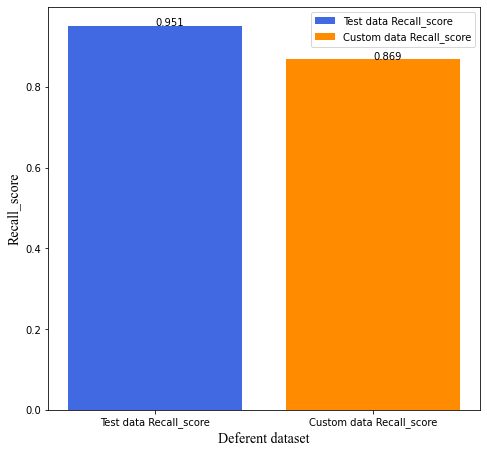

In [204]:
import matplotlib.pyplot as plt
fig = plt.figure()
Recall_y= (recall, c_recall)
ax1 = fig.add_axes([0,0,1,1.4])
ax2 = fig.add_axes([0,0,1,1.4])
ax1.bar('Test data Recall_score',recall,color='royalblue')
ax2.bar('Custom data Recall_score',c_recall,color='darkorange')
title= ['Test data Recall_score', 'Custom data Recall_score']
plt.xlabel("Deferent dataset",fontsize=14,fontname = 'Times New Roman')
plt.ylabel("Recall_score",fontsize=14,fontname = 'Times New Roman')
#scorevalue = [c_f1_score,f1_score]
#ax.bar(title,scorevalue,color=['darkslateblue','orangered'])
for index, value in enumerate(Recall_y):
    plt.text(index,value, str('%.3f' %value))
plt.legend(title,loc ="upper right")
plt.show()

G:\Anaconda\envs\tf-gpu\lib\site-packages\ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  """


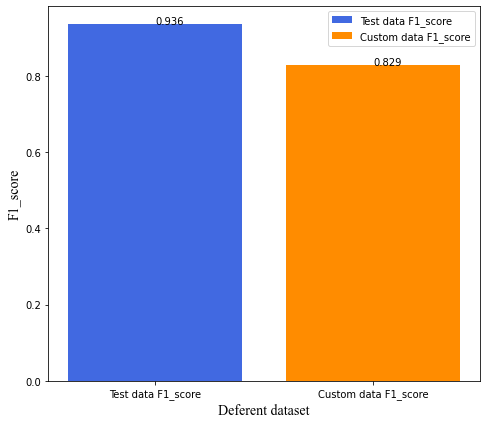

In [205]:
import matplotlib.pyplot as plt
fig = plt.figure()
F1_y= (f1_score, c_f1_score)
ax1 = fig.add_axes([0,0,1,1.3])
ax2 = fig.add_axes([0,0,1,1.3])
ax1.bar('Test data F1_score',f1_score,color='royalblue')
ax2.bar('Custom data F1_score',c_f1_score,color='darkorange')
title= ['Test data F1_score', 'Custom data F1_score']
plt.xlabel("Deferent dataset",fontsize=14,fontname = 'Times New Roman')
plt.ylabel("F1_score",fontsize=14,fontname = 'Times New Roman')
#scorevalue = [c_f1_score,f1_score]
#ax.bar(title,scorevalue,color=['darkslateblue','orangered'])
for index, value in enumerate(F1_y):
    plt.text(index,value, str('%.3f' %value))
plt.legend(title,loc ="upper right")
plt.show()

In [32]:
error=tf.keras.metrics.mean_absolute_error(
    c_true_classes,c_predicted_classes
)
print(error)

tf.Tensor(2, shape=(), dtype=int64)
